<a href="https://colab.research.google.com/github/coopercunliffe/springboard/blob/master/tweet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud, STOPWORDS 


pd.set_option('display.max_colwidth', 100)

In [0]:
def plot_wordcloud(df):

  comment_words = '' 
  stopwords = set(STOPWORDS)
  stopwords.update(['realdonaldtrump', 'https', 'will', 'co', 'donald',
                    'amp', 'rt', 'thank', 'thanks', 'great', 'people', 'trump'])

  for val in df['text']: 
        
      # typecaste each val to string 
      val = str(val) 
    
      # split the value 
      tokens = val.split() 
        
      # Converts each token into lowercase 
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words)
                  
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
    
  plt.show()

In [0]:
df1 = pd.read_csv('/content/drive/My Drive/twitter data/train_df.csv', lineterminator='\n', index_col=0)
df2 = pd.read_csv('/content/drive/My Drive/twitter data/train_df_2.csv', lineterminator='\n', index_col=0)

tweet_df = pd.read_csv('/content/drive/My Drive/twitter data/tweet_df.csv', lineterminator='\n', index_col=0)

be sure to tune in and watch donald trump on late night with david letterman as he presents the top 


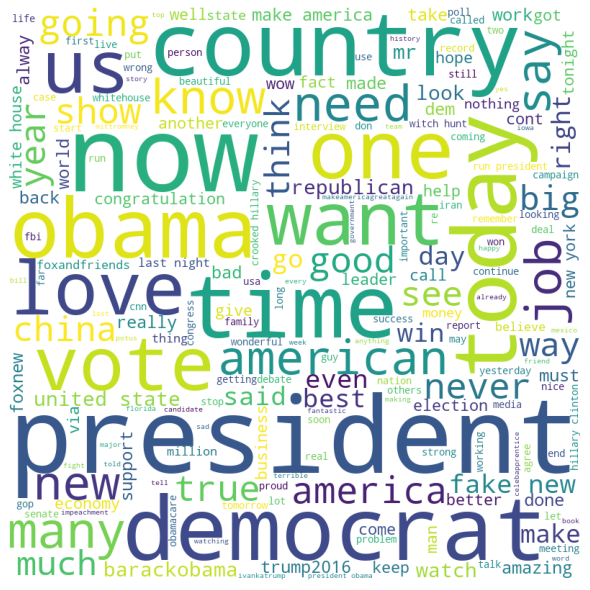

In [0]:
plot_wordcloud(tweet_df)

In [0]:
df1.head()

,label,text,is_valid,predictions
0,True,I have been briefed on the U.S. C-130 “Hercules” cargo plane from the Puerto Rico National Guard...,False,"(Category tensor(1), tensor(1), tensor([0.0029, 0.9971]))"
1,False,Welcome to the 'Islamist Winter' - the Muslim Brotherhood is now taking over the Egyptian milita...,False,"(Category tensor(0), tensor(0), tensor([0.9562, 0.0438]))"
3,True,"Beto (phony name to indicate Hispanic heritage) O’Rourke, who is embarrassed by my last visit to...",False,"(Category tensor(1), tensor(1), tensor([0.2870, 0.7130]))"
4,False,"""@4mostcoach: I enjoy every @realDonaldTrump speech IN ITS ENTIRETY NOBODY's going 2 tell me wha...",False,"(Category tensor(0), tensor(0), tensor([0.9984, 0.0016]))"
7,True,Do not believe any article or story you read or see that uses “anonymous sources” having to do w...,False,"(Category tensor(1), tensor(1), tensor([4.0902e-14, 1.0000e+00]))"


In [0]:
df2.head()

,label,text,is_valid,predictions_2
0,True,The riots in Charlottesville a year ago resulted in senseless death and division. We must come t...,False,"(Category tensor(1), tensor(1), tensor([0.2749, 0.7251]))"
1,False,"""@golf_com: .@realDonaldTrump's NYC course just opened, and it is spectacular: http://t.co/9GUsp...",False,"(Category tensor(0), tensor(0), tensor([0.9959, 0.0041]))"
2,False,"""@rick_royer: @realDonaldTrump on point as always""",False,"(Category tensor(0), tensor(0), tensor([0.9966, 0.0034]))"
3,True,"The American people deserve to know who is in this Country. Yesterday, the Supreme Court took up...",False,"(Category tensor(1), tensor(1), tensor([0.3453, 0.6547]))"
4,False,"""@SassyPantsjj Please do more Apprentices', know you're busy but once a year is NOT ENOUGH !!!! ...",False,"(Category tensor(0), tensor(0), tensor([0.9984, 0.0016]))"


In [0]:
df = df1

In [0]:
df = df.rename(columns={'predictions':'raw_predictions', 'label':'is_presidential_actual'})

In [0]:
df.iloc[0]

is_presidential_actual                                                                                                   True
text                      I have been briefed on the U.S. C-130 “Hercules” cargo plane from the Puerto Rico National Guard...
is_valid                                                                                                                False
raw_predictions                                                     (Category tensor(1), tensor(1), tensor([0.0029, 0.9971]))
Name: 0, dtype: object

In [0]:
df = df.drop(columns=['is_valid'])

In [0]:
df.head()

,is_presidential_actual,text,raw_predictions
0,True,I have been briefed on the U.S. C-130 “Hercules” cargo plane from the Puerto Rico National Guard...,"(Category tensor(1), tensor(1), tensor([0.0029, 0.9971]))"
1,False,Welcome to the 'Islamist Winter' - the Muslim Brotherhood is now taking over the Egyptian milita...,"(Category tensor(0), tensor(0), tensor([0.9562, 0.0438]))"
3,True,"Beto (phony name to indicate Hispanic heritage) O’Rourke, who is embarrassed by my last visit to...","(Category tensor(1), tensor(1), tensor([0.2870, 0.7130]))"
4,False,"""@4mostcoach: I enjoy every @realDonaldTrump speech IN ITS ENTIRETY NOBODY's going 2 tell me wha...","(Category tensor(0), tensor(0), tensor([0.9984, 0.0016]))"
7,True,Do not believe any article or story you read or see that uses “anonymous sources” having to do w...,"(Category tensor(1), tensor(1), tensor([4.0902e-14, 1.0000e+00]))"


In [0]:
df.iloc[0][2]

'(Category tensor(1), tensor(1), tensor([0.0029, 0.9971]))'

In [0]:
predicts = df['raw_predictions']

In [0]:
predicts = predicts.str.split()

In [0]:
predicts

0                [(Category, tensor(1),, tensor(1),, tensor([0.0029,, 0.9971]))]
1                [(Category, tensor(0),, tensor(0),, tensor([0.9562,, 0.0438]))]
3                [(Category, tensor(1),, tensor(1),, tensor([0.2870,, 0.7130]))]
4                [(Category, tensor(0),, tensor(0),, tensor([0.9984,, 0.0016]))]
7        [(Category, tensor(1),, tensor(1),, tensor([4.0902e-14,, 1.0000e+00]))]
                                          ...                                   
41916            [(Category, tensor(0),, tensor(0),, tensor([0.9967,, 0.0033]))]
41917            [(Category, tensor(1),, tensor(1),, tensor([0.0034,, 0.9966]))]
41918    [(Category, tensor(1),, tensor(1),, tensor([9.4392e-27,, 1.0000e+00]))]
41919            [(Category, tensor(0),, tensor(0),, tensor([0.9978,, 0.0022]))]
41920            [(Category, tensor(0),, tensor(0),, tensor([0.6503,, 0.3497]))]
Name: raw_predictions, Length: 33537, dtype: object

In [0]:
predicts = [predicts.iloc[i][1:] for i in range(len(predicts))]

In [0]:
len(predicts)

33537

In [0]:
predicts = [predicts[i][1:] for i in range(len(predicts))]

In [0]:
predicts[0:20]

[['tensor(1),', 'tensor([0.0029,', '0.9971]))'],
 ['tensor(0),', 'tensor([0.9562,', '0.0438]))'],
 ['tensor(1),', 'tensor([0.2870,', '0.7130]))'],
 ['tensor(0),', 'tensor([0.9984,', '0.0016]))'],
 ['tensor(1),', 'tensor([4.0902e-14,', '1.0000e+00]))'],
 ['tensor(0),', 'tensor([9.9932e-01,', '6.8475e-04]))'],
 ['tensor(0),', 'tensor([0.9882,', '0.0118]))'],
 ['tensor(0),', 'tensor([0.9986,', '0.0014]))'],
 ['tensor(0),', 'tensor([0.9520,', '0.0480]))'],
 ['tensor(0),', 'tensor([0.9983,', '0.0017]))'],
 ['tensor(0),', 'tensor([0.9664,', '0.0336]))'],
 ['tensor(0),', 'tensor([0.9861,', '0.0139]))'],
 ['tensor(0),', 'tensor([0.8479,', '0.1521]))'],
 ['tensor(1),', 'tensor([0.0375,', '0.9625]))'],
 ['tensor(0),', 'tensor([0.9162,', '0.0838]))'],
 ['tensor(0),', 'tensor([0.9956,', '0.0044]))'],
 ['tensor(0),', 'tensor([0.6670,', '0.3330]))'],
 ['tensor(1),', 'tensor([0.0991,', '0.9009]))'],
 ['tensor(1),', 'tensor([0.0895,', '0.9105]))'],
 ['tensor(0),', 'tensor([0.9923,', '0.0077]))']]

In [0]:
df['is_presidential_predict'] = [True if predicts[i][0] == 'tensor(1),' else False for i in range(len(predicts))]

In [0]:
predicts[4]

['tensor(1),', 'tensor([4.0902e-14,', '1.0000e+00]))']

In [0]:
def confidence(predict):
  text = predict[2]
  numbers = re.findall(r'\d+', text)
  if len(numbers) == 2:
    return(int(numbers[1]) / 10**(len(numbers[1])))
  elif len(numbers) == 3:
    return((int(numbers[0]) + int(numbers[1]) / 10 ** len(numbers[1])) * (10 ** (-int(numbers[2]))))
  else:
    return(int(numbers[0]) * 1.0)
    



In [0]:
confidence(predicts[5])

0.00068475

In [0]:
df['is_presidential_confidence'] = [confidence(predicts[i]) for i in range(len(predicts))]

In [0]:
df.head()

,is_presidential_actual,text,raw_predictions,is_presidential_predict,is_presidential_confidence
0,True,I have been briefed on the U.S. C-130 “Hercules” cargo plane from the Puerto Rico National Guard...,"(Category tensor(1), tensor(1), tensor([0.0029, 0.9971]))",True,0.9971
1,False,Welcome to the 'Islamist Winter' - the Muslim Brotherhood is now taking over the Egyptian milita...,"(Category tensor(0), tensor(0), tensor([0.9562, 0.0438]))",False,0.0438
3,True,"Beto (phony name to indicate Hispanic heritage) O’Rourke, who is embarrassed by my last visit to...","(Category tensor(1), tensor(1), tensor([0.2870, 0.7130]))",True,0.7130
4,False,"""@4mostcoach: I enjoy every @realDonaldTrump speech IN ITS ENTIRETY NOBODY's going 2 tell me wha...","(Category tensor(0), tensor(0), tensor([0.9984, 0.0016]))",False,0.0016
7,True,Do not believe any article or story you read or see that uses “anonymous sources” having to do w...,"(Category tensor(1), tensor(1), tensor([4.0902e-14, 1.0000e+00]))",True,1.0000


In [0]:
confusion_matrix(df.is_presidential_actual, df.is_presidential_predict)



array([[23821,   354],
       [  224,  9138]])

In [0]:
TP = df[(df.is_presidential_actual == True) & (df.is_presidential_predict == True)]
FN = df[(df.is_presidential_actual == False) & (df.is_presidential_predict == False)]
TN = df[(df.is_presidential_actual == True) & (df.is_presidential_predict == False)]
FP = df[(df.is_presidential_actual == False) & (df.is_presidential_predict == True)]


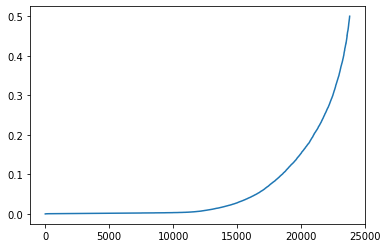

In [0]:
FN.sort_values('is_presidential_confidence')['is_presidential_confidence'].reset_index(drop=True).plot()

join me! 6/10: richmond, va - 8pm 6/11: tampa, fl - 11am 6/11: pittsburgh, pa - 3pm 6/13: portsmouth


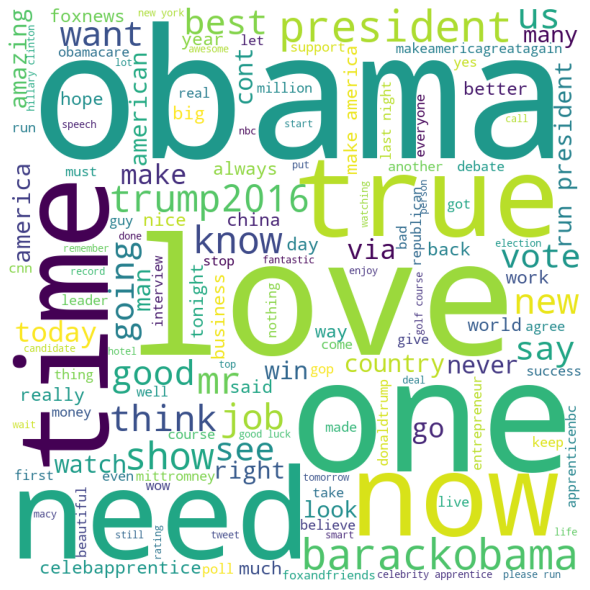

In [0]:
plot_wordcloud(FN[FN.is_presidential_confidence <= .2].sort_values('is_presidential_confidence'))

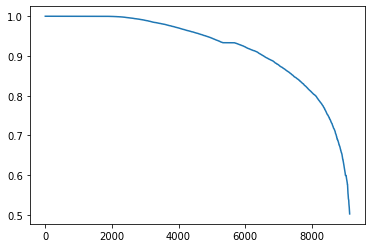

In [0]:
TP.sort_values('is_presidential_confidence', ascending=False)['is_presidential_confidence'].reset_index(drop=True).plot()

congressman @lancegooden has done a wonderful job for the people of texas while supporting our #maga


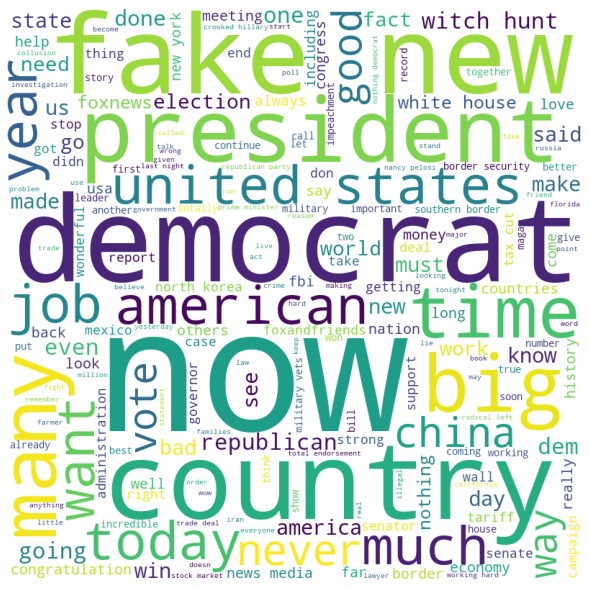

In [0]:
plot_wordcloud(TP[TP.is_presidential_confidence >= .8].sort_values('is_presidential_confidence', ascending=False))

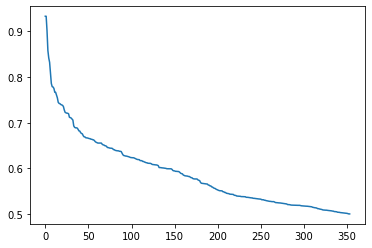

In [0]:
FP.sort_values('is_presidential_confidence', ascending=False)['is_presidential_confidence'].reset_index(drop=True).plot()

will be in orlando, florida, this afternoon. 25,000 people expected. this is a movement like our gre


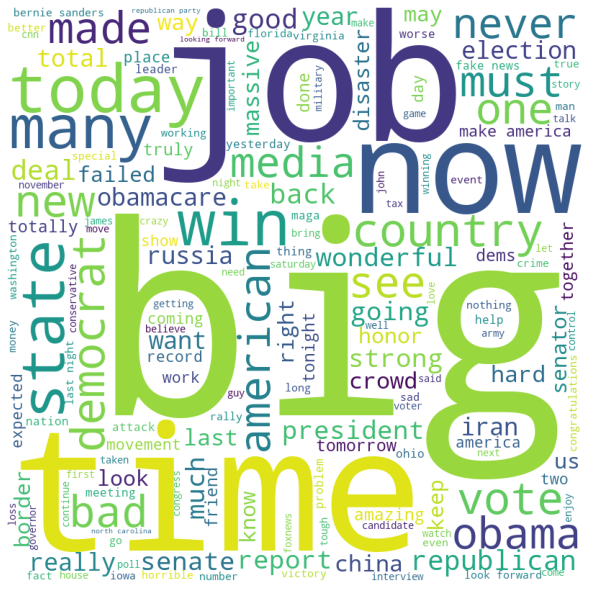

In [0]:
plot_wordcloud(FP)

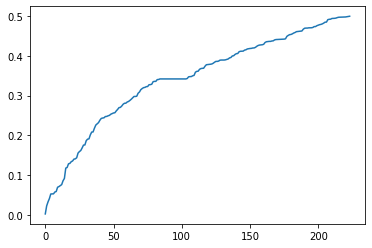

In [0]:
TN.sort_values('is_presidential_confidence')['is_presidential_confidence'].reset_index(drop=True).plot()

@nhc_atlantic oh well, we still have the great @seanhannity who i hear has a really strong show toni


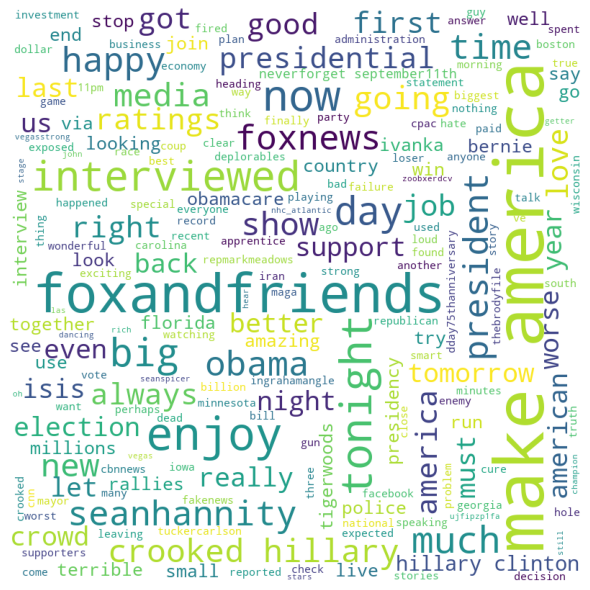

In [0]:
plot_wordcloud(TN)